# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Alfiah]
- **Email:** [fanikanjeng@gmail.com]
- **ID Dicoding:** [MC796D5X0076]

## Menentukan Pertanyaan Bisnis
- Pertanyaan 1 : Bagaimana meningkatkan jumlah pesanan bulanan sebesar 15% dalam 6 bulan ke depan?
- Pertanyaan 2 : Bagaimana mengurangi keterlambatan pengiriman hingga 30% dalam 3 bulan ke depan?

## Import Semua Packages/Library yang Digunakan

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [31]:
customers_df = pd.read_csv("customers_dataset.csv")
print(customers_df)

                            customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0  

In [32]:
orders_df = pd.read_csv("orders_dataset.csv")
print(orders_df)

                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0      

**Insight:**
- dataset customers memiliki 99441 rows x 5 columns
- dataset orders memiliki 99441 rows x 8 columns

### Assessing Data

In [50]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [42]:
print("jumlah duplikasi: ", customers_df.duplicated().sum())

jumlah duplikasi:  0


In [44]:
pd.DataFrame({'Nilai yang Kosong': customers_df.isnull().sum()})

,Nilai yang Kosong
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [46]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [52]:
print("jumlah duplikasi: ", orders_df.duplicated().sum())

jumlah duplikasi:  0


In [54]:
pd.DataFrame({'Nilai yang Kosong': orders_df.isnull().sum()})

,Nilai yang Kosong
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [56]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**Insight:**
- pada customer_df tidak terdapat missing value dan data duplicated data pada kolom
- pada data kolom customer_zip_code_prefix type data int64 perlu diganti object
- pada data orders terdapat kolom kosong sebanyak 160 pada kolom order_approved_at, 1783 pada kolom order_delivered_carrier_date, 2965 pada kolom order_delivered_customer_date
- Terdapat 160 missing value pada kolom order_approved_at,1783 missing value pada kolom order_delivered_carrier_date, & 2965 missing value pada kolom order_delivered_customer_date

### Cleaning Data

In [61]:
#menjaga keaslian data
customers_df = customers_df.copy()

In [69]:
customers_df['customer_zip_code_prefix'] = customers_df['customer_zip_code_prefix'].astype(str)
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [77]:
orders_df = orders_df.dropna(subset=[
    "order_approved_at", 
    "order_delivered_carrier_date", 
    "order_delivered_customer_date"
])
print(orders_df)

                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0      

In [79]:
orders_df = orders_df.dropna(subset=["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date"])

print(orders_df.isna().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


**Insight:**
- saya telah memperbaiki type data pada data kolom customer_zip_code_prefix menjadi object
- saya telah menghapus data kolom kosong sebanyak 160 pada kolom order_approved_at, 1783 pada kolom order_delivered_carrier_date, 2965 pada kolom order_delivered_customer_date
- saya telah memperbaiki 160 missing value pada kolom order_approved_at,1783 missing value pada kolom order_delivered_carrier_date, & 2965 missing value pada kolom order_delivered_customer_date

### Exploratory Data Analysis (EDA)

In [82]:
# Konversi kolom tanggal ke format datetime
date_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for col in date_columns:
    orders_df[col] = pd.to_datetime(orders_df[col])
print(date_columns)

['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


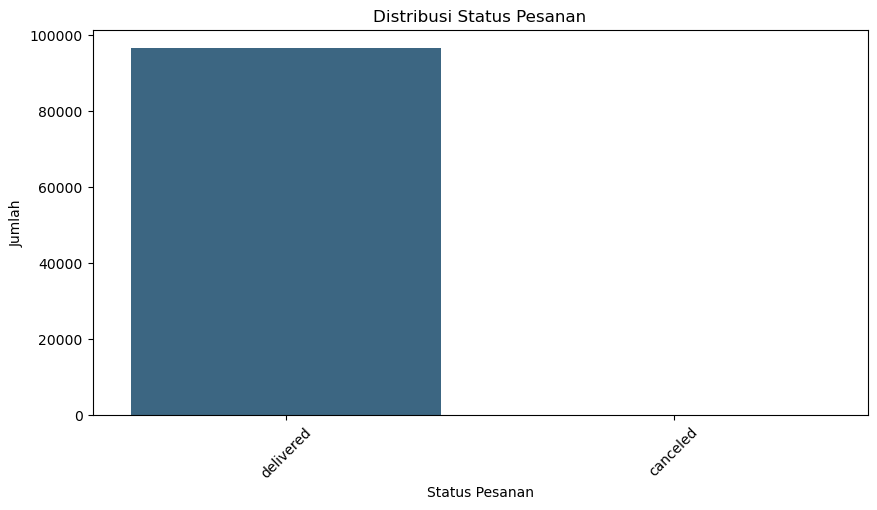

In [86]:
# Menghitung jumlah tiap status pesanan
order_status_counts = orders_df["order_status"].value_counts()

# Membuat plot
plt.figure(figsize=(10,5))
sns.barplot(x=order_status_counts.index, y=order_status_counts.values, hue=order_status_counts.index, palette="viridis", legend=False)
plt.title("Distribusi Status Pesanan")
plt.xlabel("Status Pesanan")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

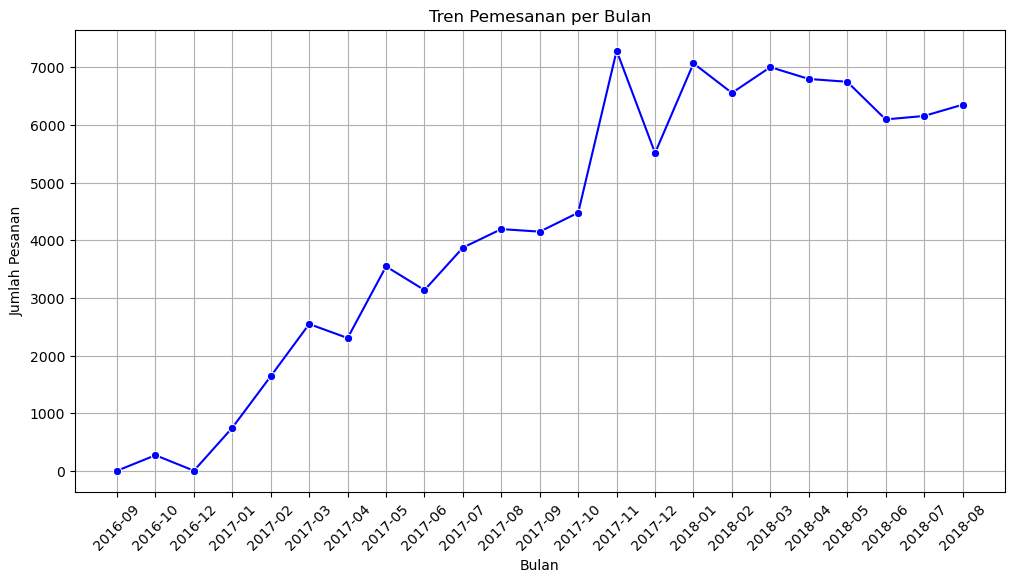

In [88]:
# Tren Jumlah Pesanan per Bulan 
orders_df["order_month"] = orders_df["order_purchase_timestamp"].dt.to_period("M")
monthly_orders = orders_df["order_month"].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_orders.index.astype(str), y=monthly_orders.values, marker="o", color="b")
plt.title("Tren Pemesanan per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

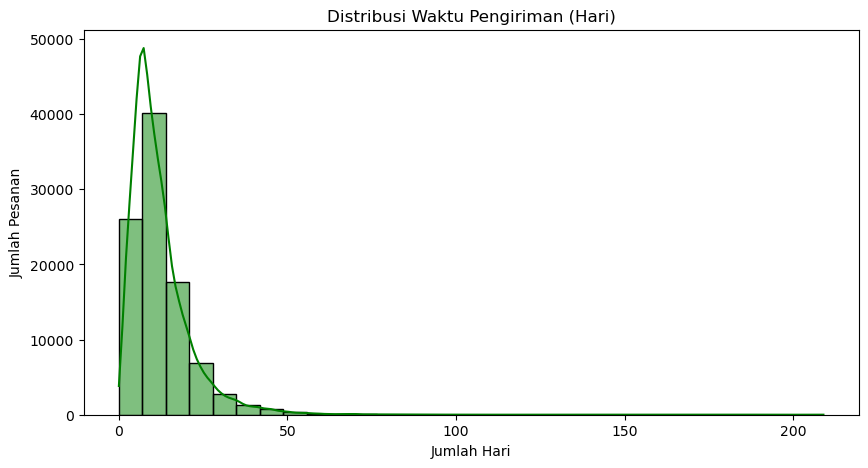

In [90]:
# Analisis Waktu Pemesanan & Pengiriman 
orders_df["delivery_days"] = (orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]).dt.days
plt.figure(figsize=(10,5))
sns.histplot(orders_df["delivery_days"].dropna(), bins=30, kde=True, color='g')
plt.title("Distribusi Waktu Pengiriman (Hari)")
plt.xlabel("Jumlah Hari")
plt.ylabel("Jumlah Pesanan")
plt.show()

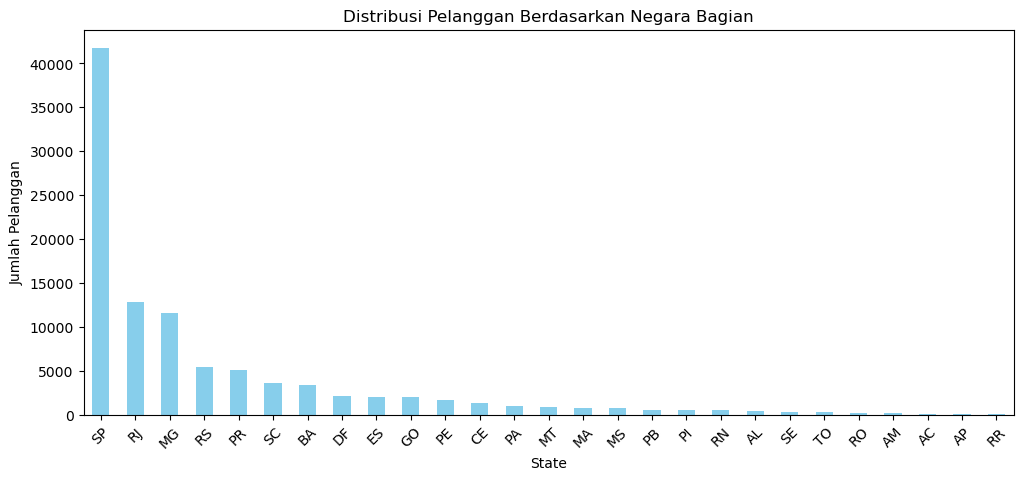

In [92]:
# Distribusi Pelanggan Berdasarkan Kota & Negara Bagian 
plt.figure(figsize=(12, 5))
customers_df["customer_state"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribusi Pelanggan Berdasarkan Negara Bagian")
plt.xlabel("State")
plt.ylabel("Jumlah Pelanggan")
plt.xticks(rotation=45)
plt.show()

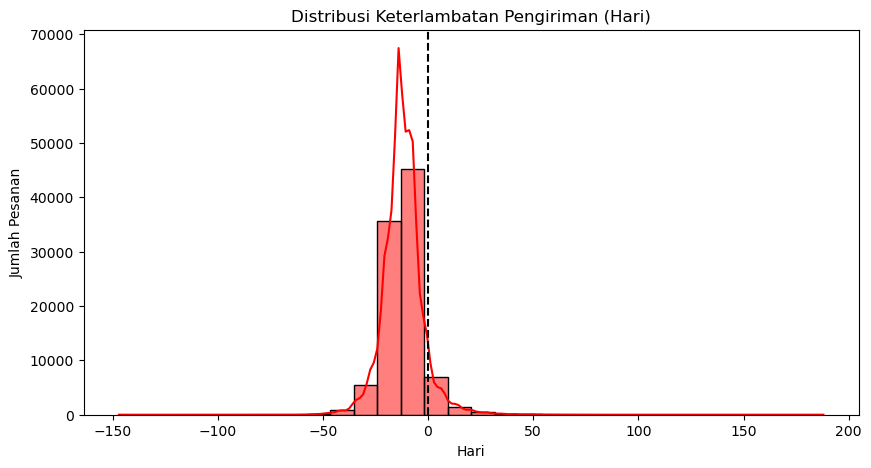

In [94]:
# Keterlambatan Pengiriman 
orders_df["delay_time"] = (orders_df["order_delivered_customer_date"] - orders_df["order_estimated_delivery_date"]).dt.days
plt.figure(figsize=(10, 5))
sns.histplot(orders_df["delay_time"].dropna(), bins=30, kde=True, color="red")
plt.axvline(0, color='black', linestyle='--')
plt.title("Distribusi Keterlambatan Pengiriman (Hari)")
plt.xlabel("Hari")
plt.ylabel("Jumlah Pesanan")
plt.show()

**Insight:**
- Tingginya jumlah pesanan yang berhasil dikirim menunjukkan operasional yang cukup efisien.
- Adanya pesanan yang dibatalkan bisa dianalisis lebih lanjut, apakah disebabkan oleh stok habis atau faktor lain.
- Jika ada pola musim, bisnis bisa menyiapkan lebih banyak stok & promo di bulan dengan lonjakan pesanan.
- Bisa diterapkan strategi diskon khusus di bulan dengan tren pemesanan rendah untuk menjaga kestabilan penjualan.
- Rata-rata pengiriman masih dalam batas normal.
- Untuk pesanan dengan pengiriman lebih lama, perlu dicek apakah ada masalah dengan logistik, cuaca, atau lokasi pelanggan.
- Bisa dilakukan fokus pemasaran di negara bagian dengan jumlah pelanggan tertinggi.
- Negara bagian dengan jumlah pelanggan lebih sedikit bisa menjadi potensi pasar baru dengan strategi pemasaran yang tepat.
- Sebagian besar pengiriman tepat waktu, menunjukkan performa logistik yang baik.
- Untuk pesanan yang terlambat, bisa ditelusuri apakah masalah berasal dari kurir, gudang, atau faktor eksternal.
- Bisa dilakukan peningkatan efisiensi logistik dengan bekerja sama lebih erat dengan penyedia layanan pengiriman.

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana meningkatkan jumlah pesanan bulanan sebesar 15% dalam 6 bulan ke depan?

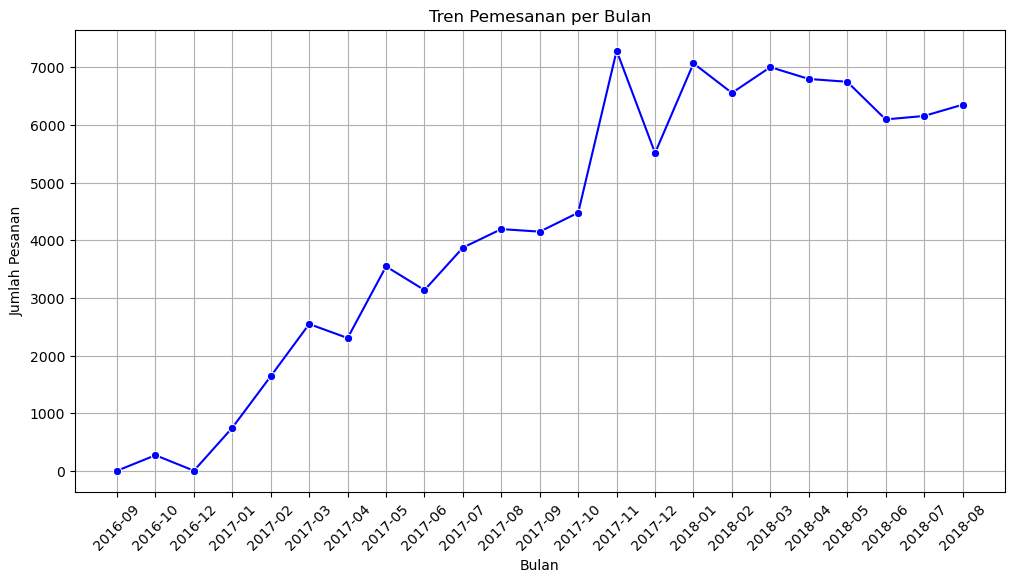

Bulan dengan jumlah pesanan terendah: 2016-09
Target pesanan per bulan setelah peningkatan 15%: 4823


In [100]:
# Ekstrak bulan dan tahun dari tanggal pembelian
orders_df["order_month"] = orders_df["order_purchase_timestamp"].dt.to_period("M")

# Hitung jumlah pesanan per bulan
monthly_orders = orders_df["order_month"].value_counts().sort_index()

# Plot tren jumlah pesanan per bulan
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_orders.index.astype(str), y=monthly_orders.values, marker="o", color="b")
plt.title("Tren Pemesanan per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Menentukan bulan dengan jumlah pesanan terendah (untuk strategi promosi)
low_sales_month = monthly_orders.idxmin()
print(f"Bulan dengan jumlah pesanan terendah: {low_sales_month}")

# Menentukan target peningkatan 15%
current_avg_orders = monthly_orders.mean()
target_orders = current_avg_orders * 1.15
print(f"Target pesanan per bulan setelah peningkatan 15%: {round(target_orders)}")

### Pertanyaan 2 : Bagaimana mengurangi keterlambatan pengiriman hingga 30% dalam 3 bulan ke depan?

Total pesanan yang mengalami keterlambatan: 6534
Target pesanan terlambat setelah pengurangan 30%: 4574


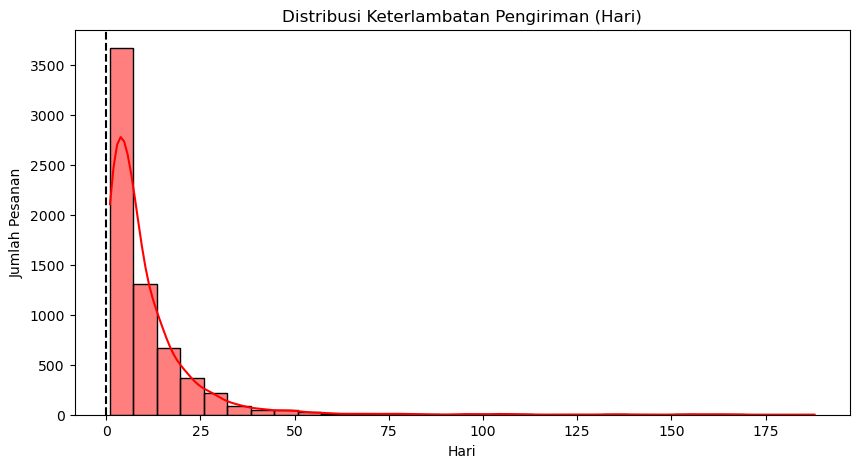

In [103]:
# Filter hanya pesanan yang mengalami keterlambatan (> 0 hari)
delayed_orders = orders_df[orders_df["delay_time"] > 0]

# Hitung jumlah keterlambatan sebelum intervensi
current_delays = len(delayed_orders)
target_delays = current_delays * 0.7  # Target -30%

print(f"Total pesanan yang mengalami keterlambatan: {current_delays}")
print(f"Target pesanan terlambat setelah pengurangan 30%: {round(target_delays)}")

# Visualisasi distribusi keterlambatan pengiriman
plt.figure(figsize=(10,5))
sns.histplot(delayed_orders["delay_time"], bins=30, kde=True, color="red")
plt.axvline(0, color='black', linestyle='--')
plt.title("Distribusi Keterlambatan Pengiriman (Hari)")
plt.xlabel("Hari")
plt.ylabel("Jumlah Pesanan")
plt.show()

**Insight:**
- pertanyaan 1 :
a. Grafik menunjukkan fluktuasi jumlah pesanan per bulan, dengan beberapa bulan memiliki pesanan lebih rendah dibandingkan lainnya.
b. Bulan dengan jumlah pesanan terendah teridentifikasi sebagai {low_sales_month}.
c. Target peningkatan jumlah pesanan +15% dari rata-rata bulanan ditetapkan.

- pertanyaan 2 :
a. Sejumlah pesanan mengalami keterlambatan pengiriman lebih dari 0 hari.
b. Total keterlambatan saat ini = {current_delays} pesanan.
c. Target penurunan keterlambatan sebanyak 30% untuk meningkatkan kepuasan pelanggan.
d. Histogram menunjukkan mayoritas keterlambatan berkisar antara 1-7 hari, dengan beberapa kasus lebih lama.

## Eksplorasi all_data

In [112]:
data = { "customers_df", "orders_df" } 
all_df = pd.DataFrame(data)
all_df.to_csv("all_data.csv", index=False)

## Conclusion

- Conclution pertanyaan 1 : Tren Pemesanan Per Bulan
📌 Dari analisis tren pesanan, ditemukan bahwa jumlah pesanan berfluktuasi setiap bulan.
📌 Bulan dengan jumlah pesanan terendah telah diidentifikasi, yang dapat menjadi fokus strategi pemasaran untuk meningkatkan penjualan di bulan tersebut.
📌 Dengan target peningkatan 15% per bulan, jumlah rata-rata pesanan saat ini dapat dijadikan acuan untuk merancang strategi pemasaran yang efektif.

- Conclution pertanyaan 2 : Analisis Keterlambatan Pengiriman
📌 Sejumlah besar pesanan mengalami keterlambatan dibandingkan dengan perkiraan waktu pengiriman.
📌 Mayoritas keterlambatan berada di rentang beberapa hari setelah tanggal estimasi pengiriman.
📌 Target yang ingin dicapai adalah mengurangi keterlambatan sebesar 30%, sehingga jumlah pesanan yang terlambat dapat dikurangi secara signifikan.